# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

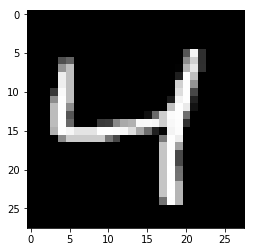

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, 784), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 784), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6950
Epoch: 1/20... Training loss: 0.6923
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6859
Epoch: 1/20... Training loss: 0.6824
Epoch: 1/20... Training loss: 0.6782
Epoch: 1/20... Training loss: 0.6719
Epoch: 1/20... Training loss: 0.6659
Epoch: 1/20... Training loss: 0.6589
Epoch: 1/20... Training loss: 0.6495
Epoch: 1/20... Training loss: 0.6395
Epoch: 1/20... Training loss: 0.6280
Epoch: 1/20... Training loss: 0.6146
Epoch: 1/20... Training loss: 0.6011
Epoch: 1/20... Training loss: 0.5852
Epoch: 1/20... Training loss: 0.5699
Epoch: 1/20... Training loss: 0.5522
Epoch: 1/20... Training loss: 0.5371
Epoch: 1/20... Training loss: 0.5167
Epoch: 1/20... Training loss: 0.4981
Epoch: 1/20... Training loss: 0.4823
Epoch: 1/20... Training loss: 0.4636
Epoch: 1/20... Training loss: 0.4460
Epoch: 1/20... Training loss: 0.4258
Epoch: 1/20... Training loss: 0.4155
Epoch: 1/20... Training loss: 0.4036
Epoch: 1/20... Training loss: 0.3824
E

Epoch: 1/20... Training loss: 0.1972
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1916
E

Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1644
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1629
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1582
E

Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1385
E

Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1228
E

Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1174
E

Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1041
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1042
Epoch: 5/20... Training loss: 0.1093
E

Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1018
E

Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.0991
E

Epoch: 7/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0979
E

Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0963
E

Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0920
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0933
E

Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.1005
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0994
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0996
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0992
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0898
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0985
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0987
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0883
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0984
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

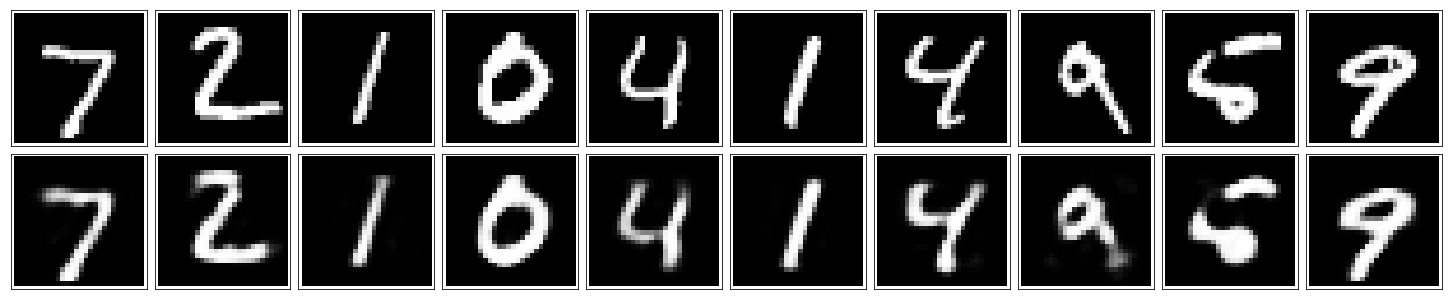

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.